In [1]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [3]:
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [4]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [5]:
dir_path = 'PlantVillage'

dataset = datasets.ImageFolder(
    root=dir_path,
    transform=transform
)

In [6]:
train_size = int(0.8* len(dataset))
test_size = len(dataset) - train_size

In [7]:
train_ds, test_ds = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(
    train_ds,
    batch_size=32,
    shuffle=True,
    pin_memory=True,
    num_workers=4
)

test_loader = DataLoader(
    test_ds,
    batch_size=32,
    shuffle=False,
    pin_memory=True,
    num_workers=4
)

In [8]:
import numpy as np
import random

In [9]:
class_labels = dataset.classes

In [10]:
def unnormalize(img):
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])

    img = img.permute(1, 2, 0).cpu().numpy()  # C,H,W → H,W,C
    img = std * img + mean
    return np.clip(img, 0, 1)

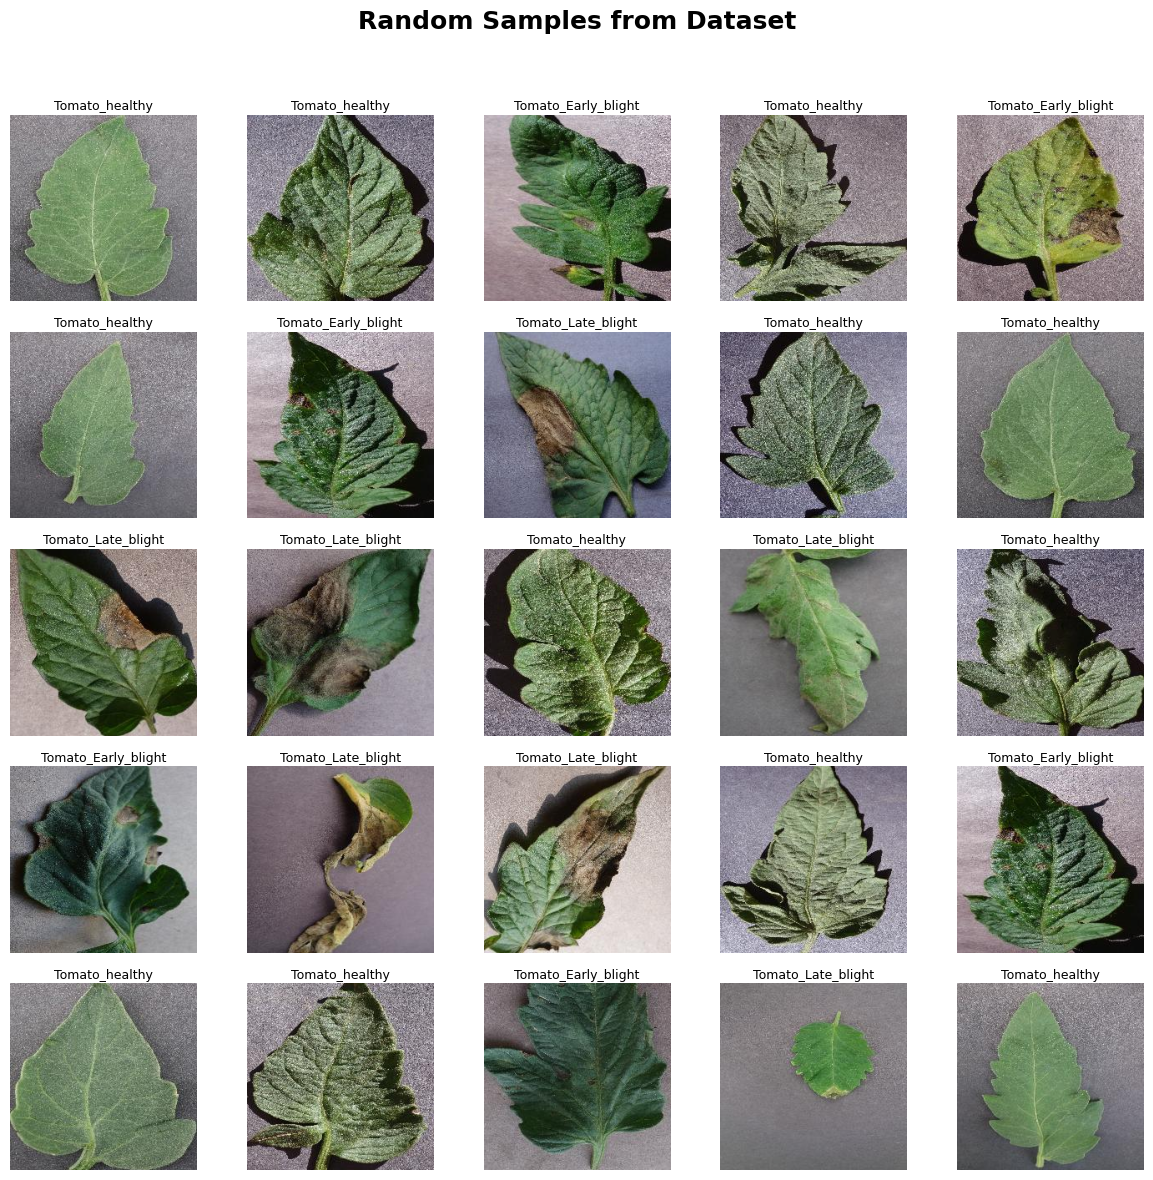

In [11]:
rows, cols = 5, 5
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
fig.suptitle("Random Samples from Dataset", fontsize=18, fontweight="bold")

axes = axes.flatten()

for i in range(rows * cols):
    idx = random.randint(0, len(dataset) - 1)
    img, label_idx = dataset[idx]

    img = unnormalize(img)

    axes[i].imshow(img)
    axes[i].set_title(
        class_labels[label_idx],
        fontsize=9,
        pad=4
    )
    axes[i].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [12]:
import torchvision.models as models

vgg16 = models.vgg16(pretrained=True)

D:\env\pytorch-cuda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\env\pytorch-cuda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [13]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [14]:
for param in vgg16.features.parameters():
    param.requires_grad=False

In [15]:
vgg16.classifier = nn.Sequential(
    nn.Linear(25088, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(512, 3)
)

In [16]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [17]:
vgg16 = vgg16.to(device)

In [18]:
learning_rate = 0.0001
epochs = 10

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.classifier.parameters(), lr=learning_rate)

In [20]:
import time

start_time = time.time()

## Create variables to track things
epochs = 10
train_loss = []

## For loop over epochs
for i in range(epochs):
    vgg16.train()
    epoch_train_loss = 0  ## to calc average train loss over all batches per epoch
        
    ## Train our model
    for b, (X_train, y_train) in enumerate(train_loader, start=1):  ## b=6000, X_train.shape --> torch.Size([10, 1, 28, 28]), y_train.shape --> ([10])
        
        ## move batches to device(cuda)
        X_train = X_train.to(device)
        y_train = y_train.to(device)
        
        y_pred = vgg16(X_train)
        loss = criterion(y_pred, y_train)
    
        ## Update/ Optimize parameters
        optimizer.zero_grad()  ## gradient = 0 every new batch to avoid gradient accumulation
        loss.backward()  ## calculating new gradients (which feature is more impactful/ which is not etc.)
        optimizer.step()  ## updating parameters

        epoch_train_loss += loss.item()
        
        ## Print results 
        if b%50 == 0:
            print(f'For Epoch: {i+1} Batch: {b}, Loss: {loss.item()}')  ## calc. loss of every 600th batch

    train_loss.append(epoch_train_loss/len(train_loader))   ## Saving average train loss after each epoch

end_time = (time.time() - start_time)/60
print(f'Total time took by our model is, {end_time:.3f} minutes.')

For Epoch: 1 Batch: 50, Loss: 0.17336148023605347
For Epoch: 1 Batch: 100, Loss: 0.14204898476600647
For Epoch: 2 Batch: 50, Loss: 0.0659867450594902
For Epoch: 2 Batch: 100, Loss: 0.10551434010267258
For Epoch: 3 Batch: 50, Loss: 0.035852666944265366
For Epoch: 3 Batch: 100, Loss: 0.025958040729165077
For Epoch: 4 Batch: 50, Loss: 0.002684165257960558
For Epoch: 4 Batch: 100, Loss: 0.023649508133530617
For Epoch: 5 Batch: 50, Loss: 0.014834759756922722
For Epoch: 5 Batch: 100, Loss: 0.007065871264785528
For Epoch: 6 Batch: 50, Loss: 0.002420771401375532
For Epoch: 6 Batch: 100, Loss: 0.0034575876779854298
For Epoch: 7 Batch: 50, Loss: 0.00012593403516802937
For Epoch: 7 Batch: 100, Loss: 0.0017542613204568624
For Epoch: 8 Batch: 50, Loss: 0.0007727998890914023
For Epoch: 8 Batch: 100, Loss: 0.00476459227502346
For Epoch: 9 Batch: 50, Loss: 0.00027597942971624434
For Epoch: 9 Batch: 100, Loss: 0.0005810964503325522
For Epoch: 10 Batch: 50, Loss: 0.0001812960981624201
For Epoch: 10 Batc

In [22]:
vgg16.eval()

# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = vgg16(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.9644444444444444


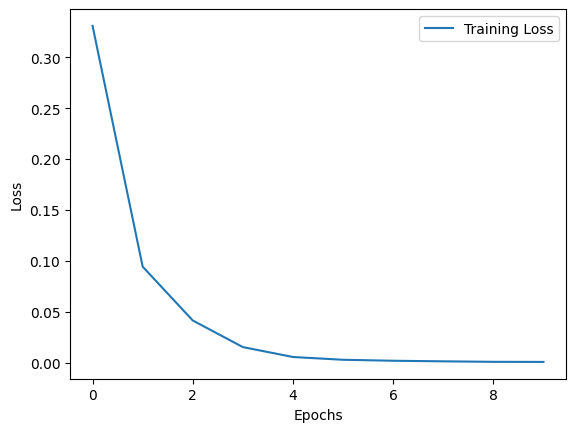

In [23]:
## Plotting results
plt.plot(train_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

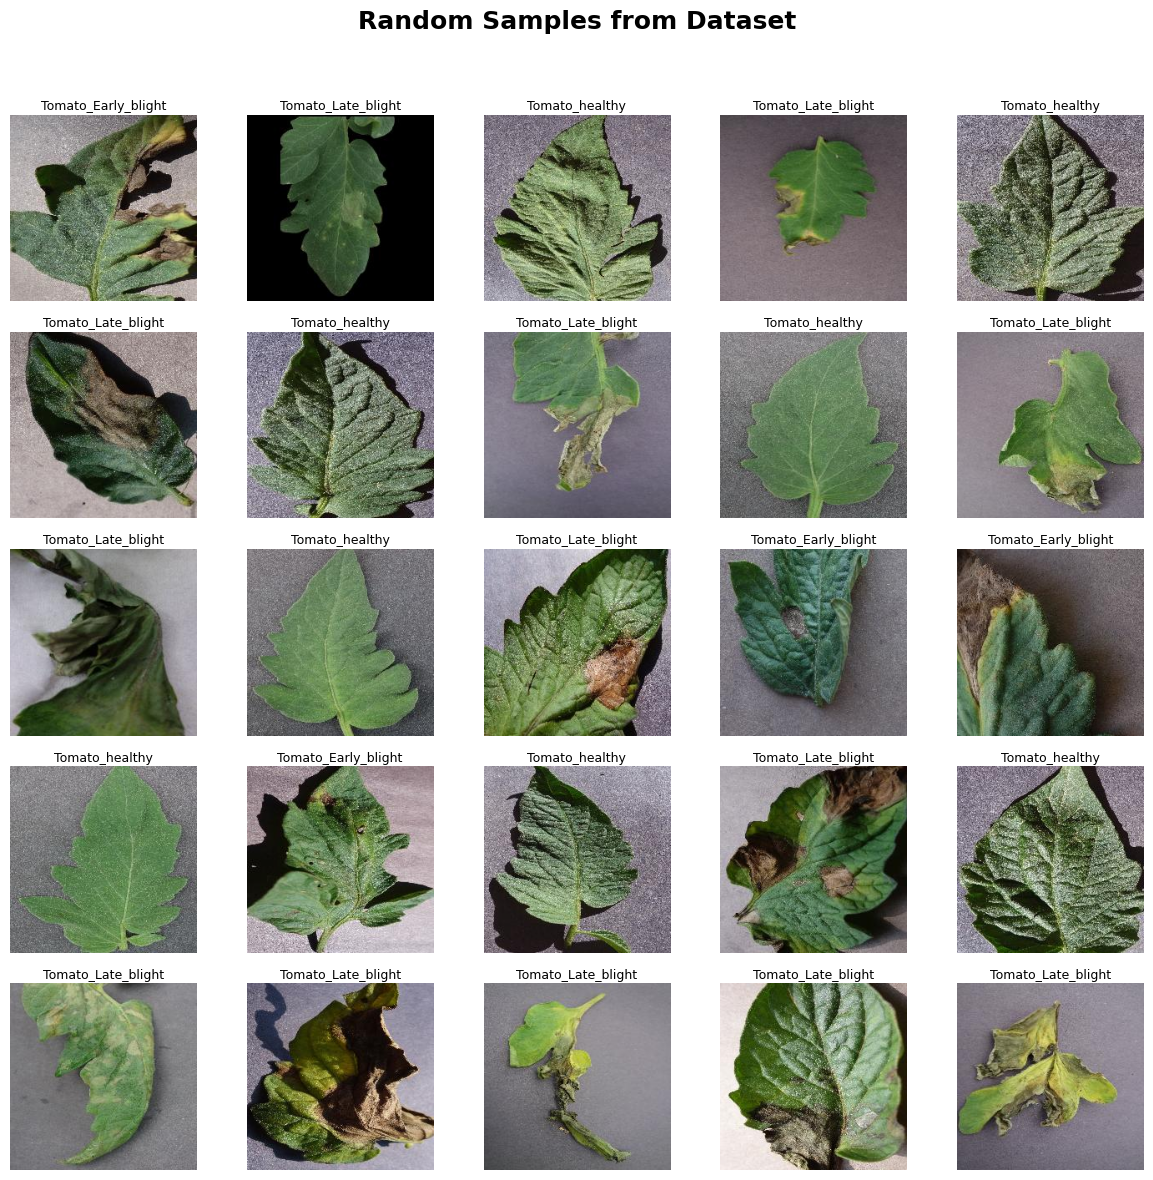

In [30]:
rows, cols = 5, 5
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
fig.suptitle("Random Samples from Dataset", fontsize=18, fontweight="bold")

axes = axes.flatten()

for i in range(rows * cols):
    idx = random.randint(0, len(dataset) - 1)
    img, _ = dataset[idx]

    img_ = unnormalize(img)

    axes[i].imshow(img_)

    vgg16.eval()
    with torch.no_grad():
        img = img.unsqueeze(0).to(device)
        output = vgg16(img)

    _, predicted = torch.max(output, 1)
    
    axes[i].set_title(
        class_labels[predicted.item()],
        fontsize=9,
        pad=4
    )
    axes[i].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [31]:
## Saving model's trained parameters
torch.save(vgg16.state_dict(), 'tomato_leaf_detector.pt')